## This time I would try the linear fit between the genes, only for interesting ones.

## Import the package

In [1]:
!pip install seaborn
try:
    import pymc as pm # For MCMC
except:
    !pip install pymc
    import pymc as pm
try:
    import arviz as az # For MCMC package
except:
    !pip install arviz
    import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
try:
    import corner
except:
    !pip install corner
    import corner

print(pm.__version__)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


5.15.0


## Data from csv

In [2]:
!pip install pandas
import pandas as pd

file_path = 'datasets/mt_genes_metadata.csv'

dfmeta = pd.read_csv(file_path)

print(dfmeta.head())

   Unnamed: 0 gene_name          gene_id  start   end gene_type  gene_version  \
0           0     MT-TF  ENSG00000210049    577   647   Mt_tRNA             1   
1           0   MT-RNR1  ENSG00000211459    648  1601   Mt_rRNA             2   
2           0     MT-TV  ENSG00000210077   1602  1670   Mt_tRNA             1   
3           0   MT-RNR2  ENSG00000210082   1671  3229   Mt_rRNA             2   
4           0    MT-TL1  ENSG00000209082   3230  3304   Mt_tRNA             1   

     hgnc_id  
0  HGNC:7481  
1  HGNC:7470  
2  HGNC:7500  
3  HGNC:7471  
4  HGNC:7490  


In [3]:
protein_coding_genes = dfmeta[dfmeta['gene_type'] == 'protein_coding']
protein_names = protein_coding_genes['gene_name'].tolist()
tRNA_coding_genes = dfmeta[dfmeta['gene_type']=='Mt_tRNA']
tRNA_names = tRNA_coding_genes['gene_name'].tolist()
rRNA_coding_genes = dfmeta[dfmeta['gene_type']=='Mt_rRNA']
rRNA_names = rRNA_coding_genes['gene_name'].tolist()

In [4]:
len(protein_names)

13

It's the 13 genes we want.

In [5]:
import pandas as pd

file_path = 'datasets/Donor1_CD4_Genes.csv'

df = pd.read_csv(file_path)

print(df.head())

           Unnamed: 0  MT-TF  MT-RNR1  MT-TV  MT-RNR2  MT-TL1  MT-ND1  MT-TI  \
0  AAACCTGCAAACTGTC.1      0        6      0       60       0      12      0   
1  AAACCTGCACAGCGTC.1      0        2      0       21       0       8      0   
2  AAACGGGAGACTGGGT.1      0       19      0       84       0       7      0   
3  AAACGGGAGGTGTTAA.1      0       27      0      115       0       3      0   
4  AAACGGGCATGGGACA.1      0       43      1      119       0       6      0   

   MT-TQ  MT-TM  ...  MT-TH  MT-TS2  MT-TL2  MT-ND5  MT-ND6  MT-TE  MT-CYB  \
0      0      0  ...      0       0       0       7       7      0      20   
1      0      0  ...      0       0       0       6       1      0      17   
2      0      0  ...      0       0       0       7       0      0      15   
3      0      0  ...      0       0       0       6       3      0      14   
4      0      0  ...      0       0       0       2       0      0       7   

   MT-TT  MT-TP  non-MT  
0      0      0    1250 

In [6]:
df2 = pd.DataFrame([df[i] for i in protein_names])
print(df2.head)

<bound method NDFrame.head of          0     1     2     3     4     5     6     7     8     9     ...  \
MT-ND1     12     8     7     3     6     7     4     8     1     7  ...   
MT-ND2      3     4     2     2     3     1     1     3     3     3  ...   
MT-CO1     23    24    16    25     6    43    16    22    18    16  ...   
MT-CO2     53    35    30    23    26    53    17    26    12    31  ...   
MT-ATP8    34    10     8    14    14    18     0    12     3    29  ...   
MT-ATP6     3     2     1     5     1     4     1     0     0     1  ...   
MT-CO3     38    34    19    23    11    46    10    19    15    26  ...   
MT-ND3      6     3     6     2     4     5     1     4     1     6  ...   
MT-ND4L    20    15    20    13    14    18     8    10     1    12  ...   
MT-ND4      5     7     3     4     0     6     1     5     3     7  ...   
MT-ND5      7     6     7     6     2     8     3     3     2     8  ...   
MT-ND6      7     1     0     3     0     0     0     1   

Now we get the gene expression levels of the 13 genes in 2888 cells, hell yeah

---
## Trying to do the example code with the data 

In [7]:
dftrial = df2[1:4]
dftrial = dftrial.T
dftrial

,MT-ND2,MT-CO1,MT-CO2
0,3,23,53
1,4,24,35
2,2,16,30
3,2,25,23
4,3,6,26
...,...,...,...
2883,0,20,15
2884,5,13,28
2885,0,10,22
2886,12,36,45


C:\Users\ruizc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


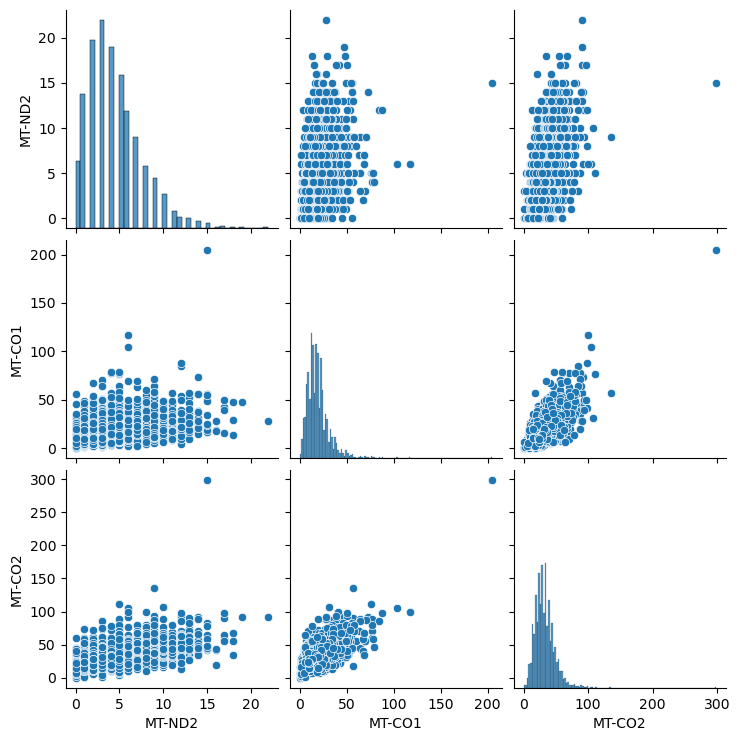

In [8]:
sns.pairplot(dftrial)
plt.show()